## PCA处理数据

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [2]:
import os 
import sys
print("本地路径 = ", sys.argv[0], "\n")

path1 = os.getcwd() #获取当前工作目录路径
path2 = os.path.abspath('.') #获取当前工作目录路径
path3 = os.path.abspath('test.txt') #获取当前目录文件下的工作目录路径
path4 = os.path.abspath('..') #获取当前工作的父目录 ！注意是父目录路径
path5 = os.path.abspath(os.curdir) #获取当前工作目录路径

print("当前的代码绝对路径 = ",path1)
print("获取当前工作目录路径 = ",path2)
print("获取当前目录文件下的工作目录路径 = ",path3)
print("获取当前工作的父目录 = ",path4)
print("获取当前工作目录路径 = ",path5)


def show_file(file_dir):
    
    print("\n\nFiles in your current working directory:")
    dirlist = os.listdir(os.getcwd())
    for i, file in enumerate(dirlist):
        print(f"  [{i}] ", file)
        
show_file(os.getcwd())

本地路径 =  d:\python\lib\site-packages\ipykernel_launcher.py 

当前的代码绝对路径 =  C:\Users\程琪皓\Desktop\PCA思路代码，直接看ipy文件的最后一个cell
获取当前工作目录路径 =  C:\Users\程琪皓\Desktop\PCA思路代码，直接看ipy文件的最后一个cell
获取当前目录文件下的工作目录路径 =  C:\Users\程琪皓\Desktop\PCA思路代码，直接看ipy文件的最后一个cell\test.txt
获取当前工作的父目录 =  C:\Users\程琪皓\Desktop
获取当前工作目录路径 =  C:\Users\程琪皓\Desktop\PCA思路代码，直接看ipy文件的最后一个cell


Files in your current working directory:
  [0]  .ipynb_checkpoints
  [1]  full_music_data.xlsx
  [2]  PCA_code.ipynb


In [3]:
dataFrame = pd.read_excel("full_music_data.xlsx")

In [4]:
# print(dataFrame.head())

In [5]:
# print(dataFrame.iloc[0,:])



idx1 = ["danceability", "energy", "valence", "tempo", "mode", "key"]
idx2 = ["acousticness", "instrumentalness","liveness","speechiness","explicit"]
idx3 = ["danceability", "energy", "valence", "tempo", "acousticness", "instrumentalness","liveness","speechiness"]#,"explicit"]
idx4 = ["danceability", "energy", "valence", "tempo","loudness", "mode", "key", "acousticness", "instrumentalness","liveness","speechiness","explicit","duration_ms","popularity","year"]
idx5 = ["danceability", "energy", "valence", "tempo","loudness", "mode", "acousticness", 
        "instrumentalness","liveness","speechiness","explicit","duration_ms"]

Sample1 = dataFrame.loc[:,idx1].values.astype(np.float64).T
Sample2 = dataFrame.loc[:,idx2].values.astype(np.float64).T
Sample3 = dataFrame.loc[:,idx3].values.astype(np.float64).T
Sample4 = dataFrame.loc[:,idx4].values.astype(np.float64).T
Sample5 = dataFrame.loc[:,idx5].values.astype(np.float64).T


print(Sample1.shape)
print(Sample2.shape)
print(Sample3.shape)
print(Sample4.shape)
print(Sample5.shape)

# print(Sample2[:7])
Samples = Sample5
# Sample3[-3] = np.log(Samples[-3] + 1E-16)

idx = idx5

(6, 98340)
(5, 98340)
(8, 98340)
(15, 98340)
(12, 98340)


In [6]:
dim = len(idx)  # specify your input data's dimension
print(dim)

12


Each line represents the data from the same character.

Each collumn represents the data of the same author.

In [7]:
# # import your data
# sample_num = 1000

# # Samples = np.random.randn(dim, sample_num)
# # Samples = np.arange(sample_num*dim).reshape(dim,-1)*0.002
# Samples = np.random.randn(dim, sample_num) + np.arange(sample_num*dim).reshape(dim,-1)*0.003

# print("idx = ", idx)
# print("sample.shape = ", Samples.shape)
# # print("前六条记录:\n", sample[:,:6])


可视化部分

[0.     0.0985 0.197  0.2955 0.394  0.4925 0.591  0.6895 0.788  0.8865
 0.985 ]


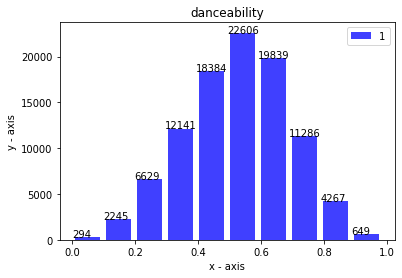

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


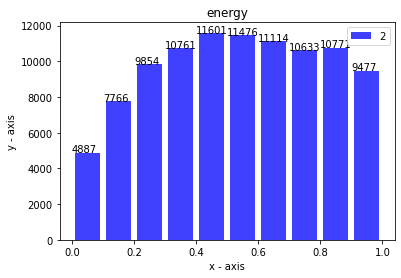

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


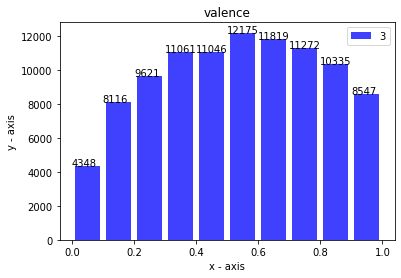

[  0.      24.4091  48.8182  73.2273  97.6364 122.0455 146.4546 170.8637
 195.2728 219.6819 244.091 ]


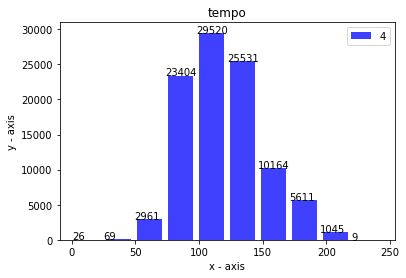

[-60.     -53.6256 -47.2512 -40.8768 -34.5024 -28.128  -21.7536 -15.3792
  -9.0048  -2.6304   3.744 ]


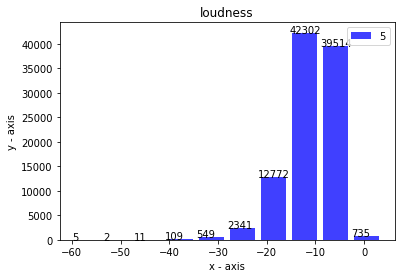

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


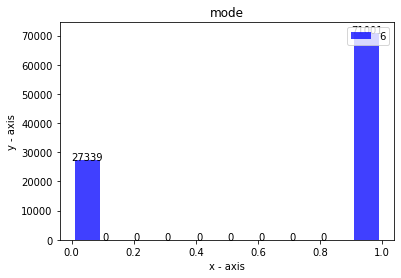

[0.     0.0996 0.1992 0.2988 0.3984 0.498  0.5976 0.6972 0.7968 0.8964
 0.996 ]


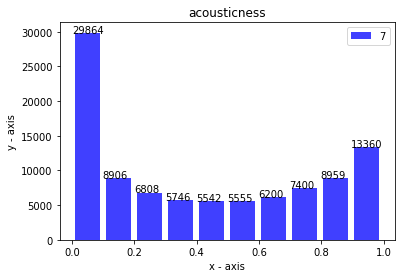

[0.     0.0999 0.1998 0.2997 0.3996 0.4995 0.5994 0.6993 0.7992 0.8991
 0.999 ]


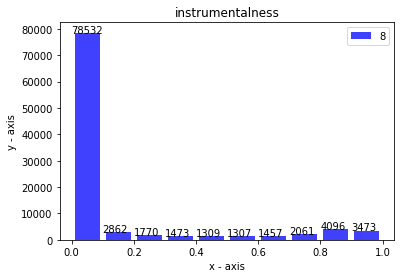

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


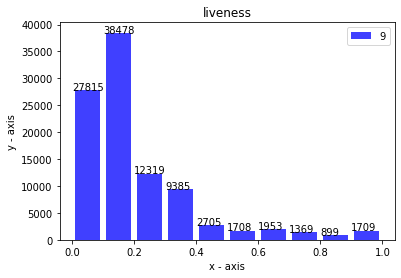

[0.     0.0964 0.1928 0.2892 0.3856 0.482  0.5784 0.6748 0.7712 0.8676
 0.964 ]


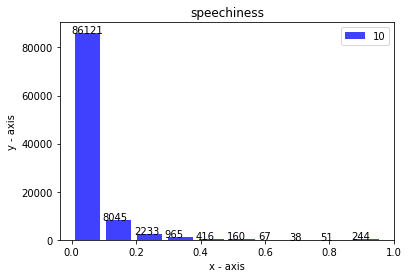

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


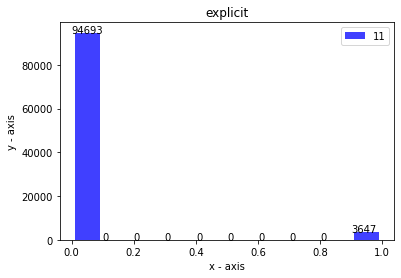

[   5108.   386234.5  767361.  1148487.5 1529614.  1910740.5 2291867.
 2672993.5 3054120.  3435246.5 3816373. ]


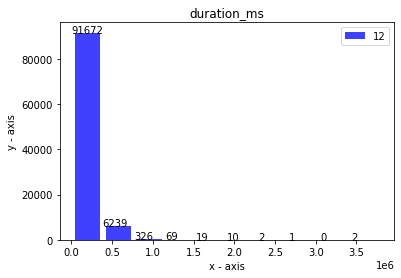

In [8]:
def draw_single(sample, xlabel = "x-axis", ylabel = "y - axis", title = "Title", hist_num = 7, label = "label")->None:
    fig, ax = plt.subplots(1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # you can adjust our parameters here.
    frequency, bins, _ = plt.hist(sample, bins = hist_num, histtype='bar',facecolor='blue',alpha=0.75,cumulative=False,rwidth=0.8, label = label) 
    print(bins)
    for i in range(hist_num):
        plt.text(bins[i], frequency[i],"{:.0f}".format(frequency[i]))
    
    plt.legend(loc = "upper right")
    plt.show()

arg_default = {"xlabel":"x-axis", "ylabel":"y - axis", "title":"Title", "hist_num":7}

def draw_sample(Samples, num = dim):
    para = {}
    for i in range(num):
        para["xlabel"] = "x - axis"
        para["ylabel"] = "y - axis"
        para["title"] = idx[i]
        para["hist_num"] = 10
        para["label"] = i + 1
        draw_single(Samples[i], **para)
        
draw_sample(Samples, num = dim)

# The kernel code

[-3.20864357 -2.60815117 -2.00765877 -1.40716638 -0.80667398 -0.20618158
  0.39431082  0.99480322  1.59529562  2.19578801  2.79628041]


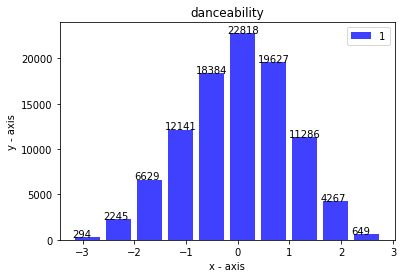

[-2.02001441 -1.64191004 -1.26380567 -0.88570131 -0.50759694 -0.12949257
  0.2486118   0.62671617  1.00482054  1.38292491  1.76102928]


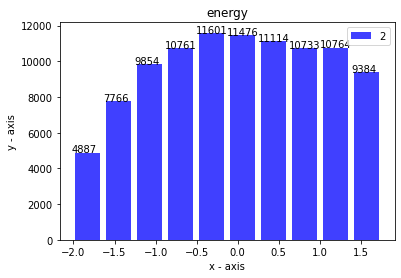

[-2.0626836  -1.67589268 -1.28910177 -0.90231085 -0.51551994 -0.12872902
  0.25806189  0.64485281  1.03164372  1.41843464  1.80522555]


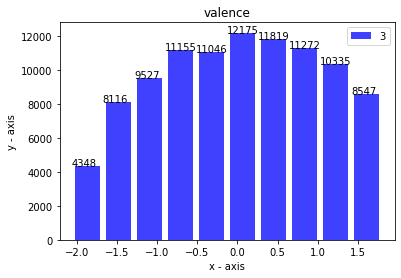

[-3.9755229  -3.159854   -2.3441851  -1.52851621 -0.71284731  0.10282159
  0.91849048  1.73415938  2.54982828  3.36549718  4.18116607]


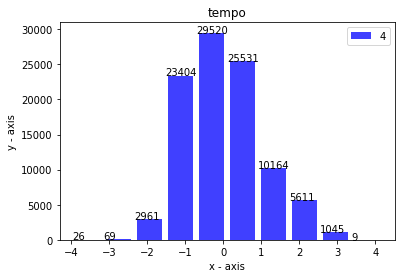

[-9.71740691 -8.45953654 -7.20166618 -5.94379582 -4.68592545 -3.42805509
 -2.17018473 -0.91231437  0.345556    1.60342636  2.86129672]


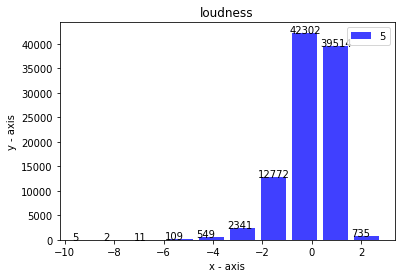

[-1.61153937 -1.38833296 -1.16512656 -0.94192015 -0.71871374 -0.49550733
 -0.27230092 -0.04909452  0.17411189  0.3973183   0.62052471]


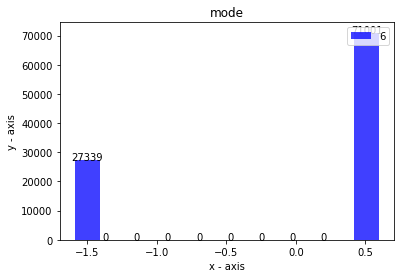

[-1.18474708 -0.90316046 -0.62157384 -0.33998722 -0.05840061  0.22318601
  0.50477263  0.78635925  1.06794587  1.34953249  1.6311191 ]


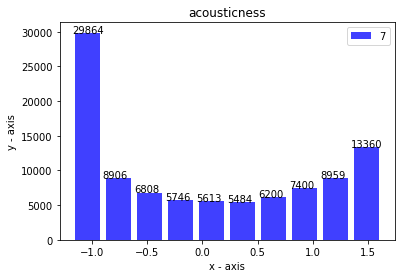

[-0.46083781 -0.09422132  0.27239518  0.63901167  1.00562817  1.37224466
  1.73886115  2.10547765  2.47209414  2.83871064  3.20532713]


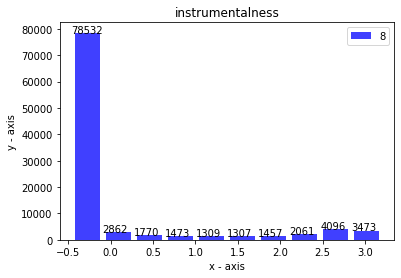

[-1.11228952 -0.57495382 -0.03761811  0.4997176   1.03705331  1.57438901
  2.11172472  2.64906043  3.18639614  3.72373184  4.26106755]


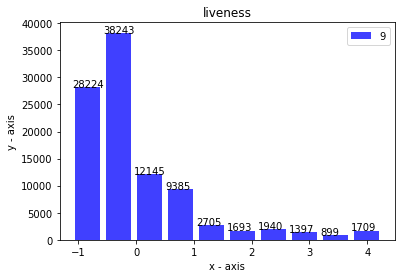

[-0.83840457  0.42828503  1.69497463  2.96166423  4.22835383  5.49504343
  6.76173303  8.02842262  9.29511222 10.56180182 11.82849142]


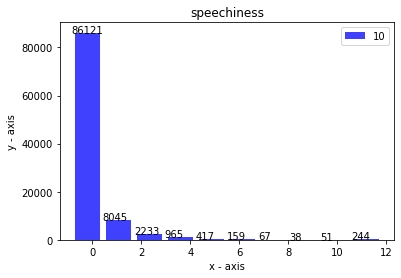

[-0.19624967  0.33293028  0.86211023  1.39129019  1.92047014  2.4496501
  2.97883005  3.50801001  4.03718996  4.56636991  5.09554987]


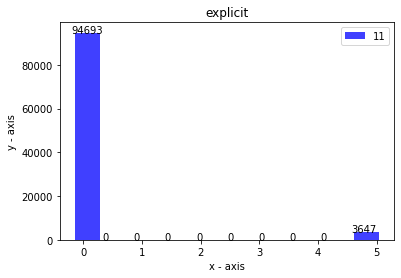

[-2.1455257   1.35672918  4.85898407  8.36123895 11.86349384 15.36574873
 18.86800361 22.3702585  25.87251338 29.37476827 32.87702316]


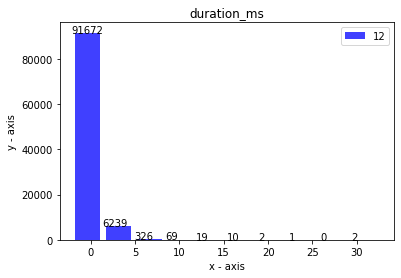

In [9]:
# First We Standerize our data to make (mean, variance) equals to (0,1)

for i in range(dim):
    sample = Samples[i]
    mean = sample.mean()
    s_var = np.sqrt(sample.var())
    Samples[i] = (Samples[i] - mean)/s_var
#     print(Samples[i].var())
# print(sample)
draw_sample(Samples, num = dim)
    

In [10]:
# Then we calculate some parameters that might be useful.

cov = np.cov(Samples)  # The Covariance Matrix of our Sample
print("cov.shape = " , cov.shape)
eigvals, eigvecs = np.linalg.eig(cov) # Calculate the eigen value and the eigen vector.

# Permutating...
eigval_Idx = np.flipud(np.argsort(eigvals))
eigvals_sorted = eigvals[eigval_Idx]
eigvecs_sorted = eigvecs[:,eigval_Idx]

Lambda = np.diag(eigvals_sorted) # Eigen values -> Matrix
print("Eigen Values= \n", eigvals_sorted)
print("Eigen Vectors = \n", eigvecs_sorted)

# print(np.rint(np.dot(eigvecs_sorted, eigvecs_sorted.T))) # check1
# print(np.rint((cov - np.dot(np.dot(eigvecs_sorted, Lambda), eigvecs_sorted.T))* 1000)) # check2

contribution = eigvals_sorted / eigvals_sorted.sum()
accumulation_of_contribution = [contribution[:_+1].sum() for _ in range(dim)]
print(contribution)




cov.shape =  (12, 12)
Eigen Values= 
 [2.98580244 1.53255927 1.21520217 1.12397671 0.98669794 0.95589045
 0.86016152 0.79297123 0.67777641 0.38913321 0.35987251 0.12007818]
Eigen Vectors = 
 [[ 0.24006461  0.54121104 -0.19083042  0.29708345 -0.12291149  0.12209551
   0.20527015 -0.11184766 -0.11624823  0.34333634 -0.5331409   0.15649848]
 [ 0.51178766 -0.1981502   0.11091705  0.00728175 -0.04896801  0.02014845
   0.03922074  0.23166889  0.15711903 -0.14529867  0.07131206  0.7599725 ]
 [ 0.31524798  0.47659031 -0.05708366  0.01192996 -0.34972364 -0.08030301
   0.20074821  0.07288027 -0.20673454 -0.35876792  0.52994147 -0.208378  ]
 [ 0.18438805 -0.15101233  0.17913329 -0.34604045 -0.1922596  -0.6989526
   0.13753998 -0.38850561 -0.222355    0.10594466 -0.18741089  0.01491258]
 [ 0.48660936 -0.1080518   0.12641127 -0.02379079  0.13755359  0.09411228
  -0.13519871  0.09787805  0.10596997 -0.46853791 -0.49053223 -0.45604182]
 [-0.01623115  0.1121257   0.09162507 -0.63980103  0.2621422   0.

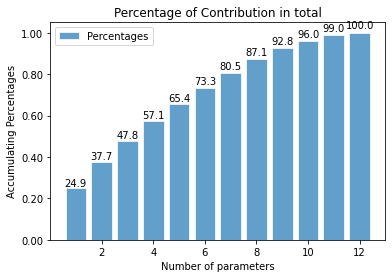

In [11]:
formatter_x = ticker.FormatStrFormatter('%d')
formatter_y = ticker.FormatStrFormatter('%1.2f')

# Number's format settings...
fig, ax = plt.subplots(1)
ax.xaxis.set_major_formatter(formatter_x)
ax.yaxis.set_major_formatter(formatter_y)


plt.title("Percentage of Contribution in total")
plt.xlabel("Number of parameters")
plt.ylabel("Accumulating Percentages")

# you can adjust our parameters here.
rects_fig = plt.bar(np.arange(dim)+1, accumulation_of_contribution, label = "Percentages", alpha = 0.7) 
def add_labels(fig):
    for rect in fig:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height+0.01*height, '{:.1f}'.format(height*100), 
                 ha='center',  va='bottom', fontsize=10)
        rect.set_edgecolor('white')
add_labels(rects_fig)
plt.legend(loc = "upper left")
plt.show()

In [12]:
print(eigvals_sorted)

[2.98580244 1.53255927 1.21520217 1.12397671 0.98669794 0.95589045
 0.86016152 0.79297123 0.67777641 0.38913321 0.35987251 0.12007818]


In [13]:
k = 2
print(idx3)
print(eigvecs_sorted.T[:k])

['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
[[ 0.24006461  0.51178766  0.31524798  0.18438805  0.48660936 -0.01623115
  -0.45638209 -0.26077016  0.06859866  0.10301124  0.13256424 -0.02887823]
 [ 0.54121104 -0.1981502   0.47659031 -0.15101233 -0.1080518   0.1121257
   0.19148305 -0.17355167 -0.33586548 -0.15334972 -0.20160952 -0.38714675]]


k为你所需要的主成分的个数


上面最后一行可以得到对应的加权的系数，前面的部分为加权的对象